In [62]:
from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [63]:
# Utility function to display images
def showImages(images, titles, cmap='gray'):
    for img, title in zip(images, titles):
        plt.figure()
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
        plt.show()


# Part 1

In [64]:
#part 1
#load the input image
img = Image.open("8-bit-graphics-pixels-scene-with-village.jpg")

#load direct access to the pixels at each container
pixels = img.load()

In [65]:
#get the widht and the height of the image 
width, height = img.size
#create an empty grey scale container each pixel will store a value from 0 -255
greyScaleImage = Image.new("L", (width, height))
#get direct access to each pixel in the empty container
greyPixels = greyScaleImage.load()
#travers throgh every pixel in the image

In [66]:
for x in range(width):
    for y in range(height):
        #unpack the values rgb value at each cordinate in the image
        r, g, b = pixels[x,y]
        #us the luminance formula to calculate the brightness value 
        greyValue = int(0.299 * r + 0.587 * g + 0.114 * b)
        #assign the intensity to every pixel in grey scal image
        greyPixels[x,y] = greyValue

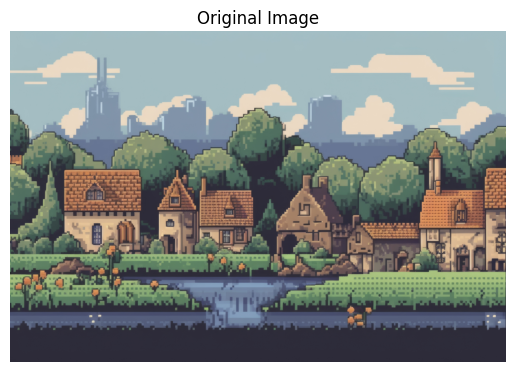

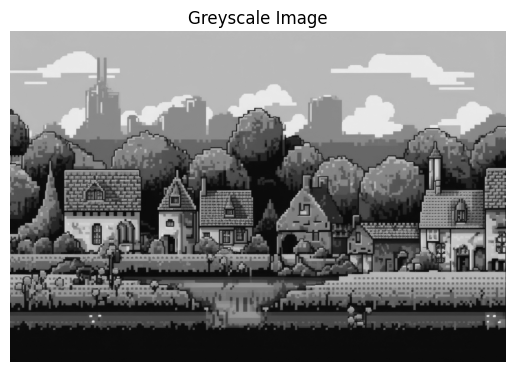

In [67]:
showImages(
    [img, greyScaleImage], 
    ["Original Image", "Greyscale Image"]
)

# Part 2

/var/folders/02/4cyhzxg17wb8d_l6km3qr2w00000gn/T/ipykernel_14949/3901186367.py:9: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return Image.fromarray(noisyImage, mode="L")


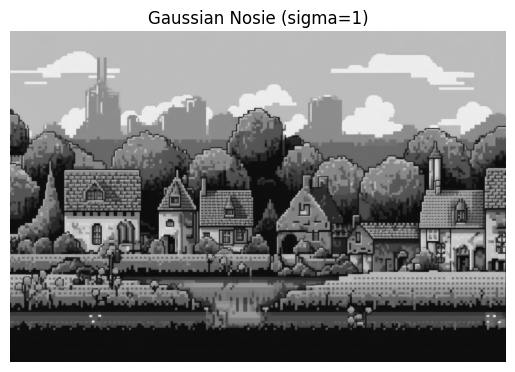

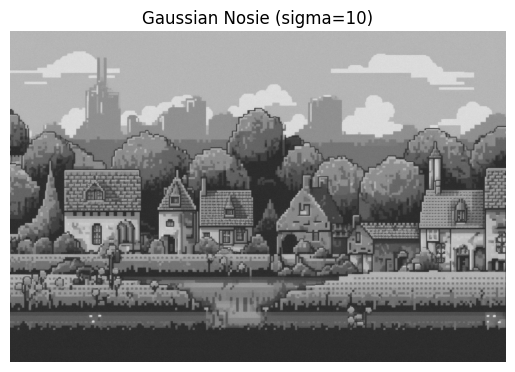

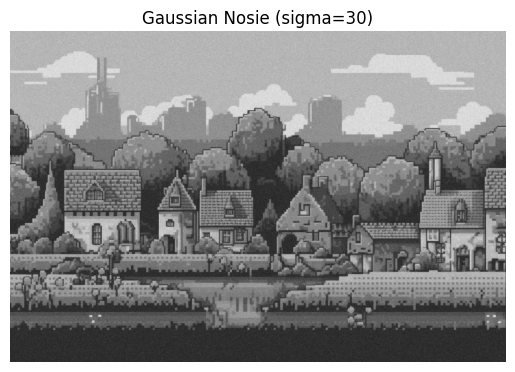

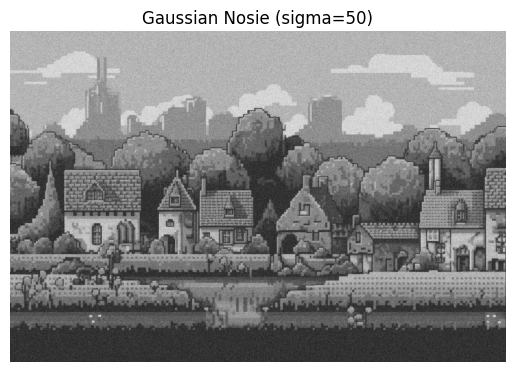

In [ ]:
def addNoise(image, sigma):
    imgArray = np.array(image, dtype=np.float32)
    n = np.random.normal(0, sigma, imgArray.shape)

    noisyImage = np.clip(imgArray + n, 0 , 255)

    noisyImage = noisyImage.astype(np.uint8)

    return Image.fromarray(noisyImage, mode="L")

sigmas = [1, 10, 30, 50]

gaussianNoises = [addNoise(greyScaleImage, s) for s in sigmas]
titles = [f"Gaussian Nosie (sigma={s})" for s in sigmas]

showImages(gaussianNoises, titles)

# Part 3

/var/folders/02/4cyhzxg17wb8d_l6km3qr2w00000gn/T/ipykernel_14949/354408482.py:22: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return Image.fromarray(output, mode="L")


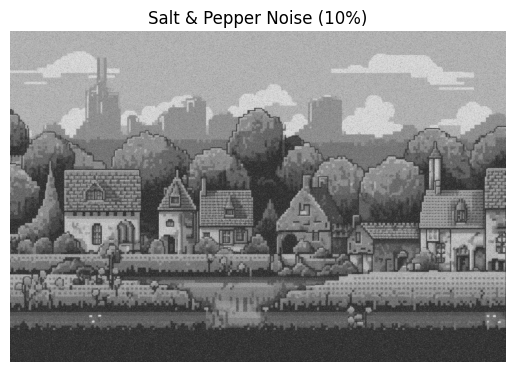

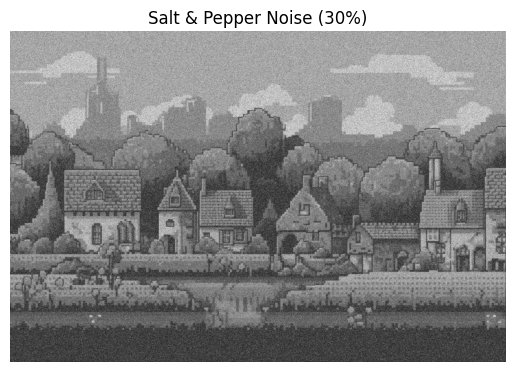

In [71]:
#part 3 
def addSaltAndPepper(image, noisePercentage):
    imgArray = np.array(image, dtype=np.uint8)
    output = np.copy(imgArray)

    totalPixels = imgArray.size

    numNosie = int(totalPixels * noisePercentage)

    #generate random cordinates for salt and pepper
    coordinates = [(np.random.randint(0, height -1), np.random.randint(0, width -1)) for _ in range(numNosie)]
    
    #split in half
    half = numNosie // 2
    saltCoordinates = coordinates[:half]
    pepperCoordinates = coordinates[half:]

    #apply
    [output.__setitem__(coord, 255) for coord in saltCoordinates]
    [output.__setitem__(coord, 0) for coord in pepperCoordinates]

    return Image.fromarray(output, mode="L")

noisy10 = addSaltAndPepper(greyScaleImage, 0.10)
noisy30 = addSaltAndPepper(greyScaleImage, 0.30)

showImages(
    [noisy10, noisy30],
    ["Salt & Pepper Noise (10%)", "Salt & Pepper Noise (30%)"]
)

# Part 4

In [74]:
#part 4

def boxFilter(image, kernalSize=3):
    imgArray = np.array(image, dtype=np.float32)
    pad = kernalSize // 2
    padded = np.pad(imgArray, pad, mode='edge')
    output = np.zeros_like(imgArray, dtype=np.float32)
    for i in tqdm(range(imgArray.shape[0]), desc="Box Filter Processing", ncols=80):
        for j in range(imgArray.shape[1]):
            region = padded[i:i+kernalSize, j:j+kernalSize]
            output[i, j] = np.mean(region)

    return Image.fromarray(output.astype(np.uint8))


def medianFilter(image, kernalSize=3):
    imgArray = np.array(image, dtype=np.float32)
    pad = kernalSize // 2
    padded = np.pad(imgArray, pad, mode='edge')
    output = np.zeros_like(imgArray, dtype=np.float32)

    for i in tqdm(range(imgArray.shape[0]), desc="Median Filter Proccessing", ncols=80):
        for j in range(imgArray.shape[1]):
            region = padded[i:i+kernalSize, j:j+kernalSize]
            output[i, j] = np.median(region)

    return Image.fromarray(output.astype(np.uint8))


def gaussianFiliter(image, kernalSize=3, sigma=1):
    imgArray = np.array(image, dtype=np.float32)
    pad = kernalSize // 2
    padded = np.pad(imgArray, pad, mode='edge')
    output = np.zeros_like(imgArray, dtype=np.float32)

    # Build the Gaussian kernel
    x, y = np.mgrid[0:kernalSize, 0:kernalSize]
    x = x - kernalSize // 2
    y = y - kernalSize // 2

    gaussiankernal = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussiankernal /= np.sum(gaussiankernal)

    # Apply kernel
    for i in tqdm(range(imgArray.shape[0]), desc="Gaussina Filter Proccessing", ncols=80):
        for j in range(imgArray.shape[1]):
            region = padded[i:i+kernalSize, j:j+kernalSize]
            output[i, j] = np.sum(region * gaussiankernal)

    return Image.fromarray(output.astype(np.uint8))


In [75]:
# ----------------------------
# Apply filters directly to your noisy images
# ----------------------------

noisyGaussian = addNoise(greyScaleImage, 50)
noisySP = addSaltAndPepper(greyScaleImage, 0.3)

# Apply filters
noisBoxFiltered = boxFilter(noisyGaussian)
noiseMedianFiltered = medianFilter(noisySP)
noiseGaussianFiltered = gaussianFiliter(noisyGaussian, sigma=1)


/var/folders/02/4cyhzxg17wb8d_l6km3qr2w00000gn/T/ipykernel_14949/3901186367.py:9: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return Image.fromarray(noisyImage, mode="L")
/var/folders/02/4cyhzxg17wb8d_l6km3qr2w00000gn/T/ipykernel_14949/354408482.py:22: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return Image.fromarray(output, mode="L")
Gaussina Filter Proccessing: 100%|█████████| 2688/2688 [00:26<00:00, 101.57it/s]


In [72]:
spBoxFiltered = boxFilter(noisySP)
spMedianFiltered = medianFilter(noisySP)
spGaussianFiltered = gaussianFiliter(noisySP, sigma=1)

Gaussina Filter Proccessing: 100%|█████████| 2688/2688 [00:25<00:00, 103.64it/s]


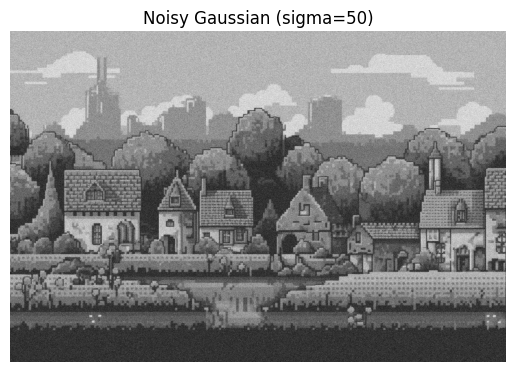

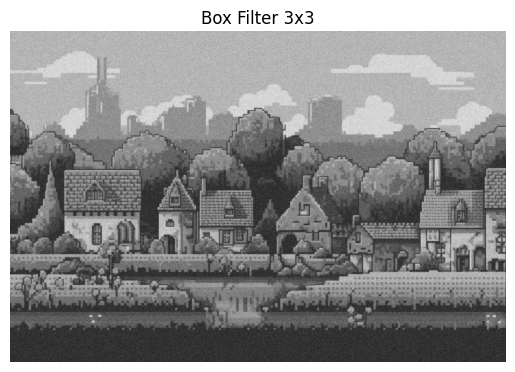

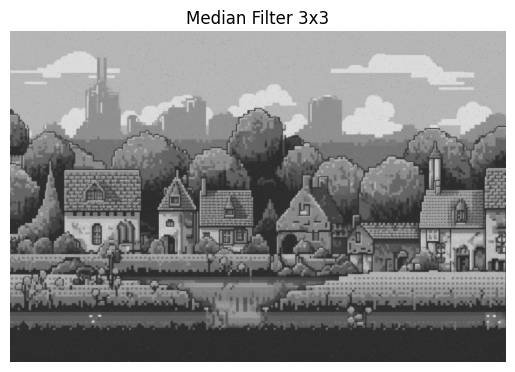

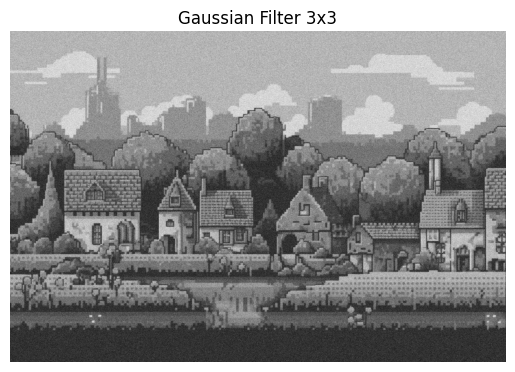

In [76]:
showImages(
    [noisyGaussian, noisBoxFiltered, noiseMedianFiltered, noiseGaussianFiltered],
    ["Noisy Gaussian (sigma=50)", "Box Filter 3x3", "Median Filter 3x3", "Gaussian Filter 3x3"]
)

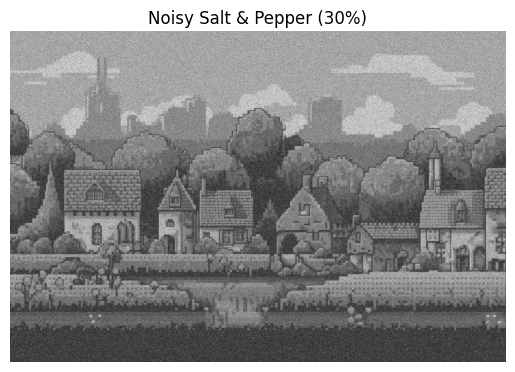

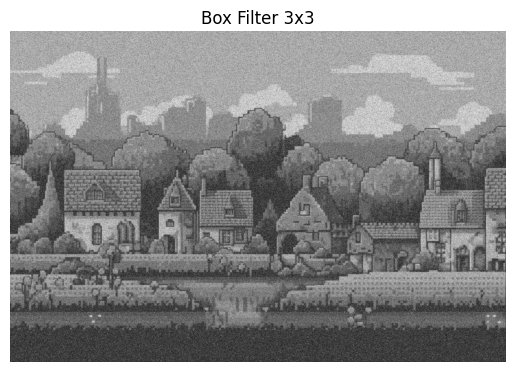

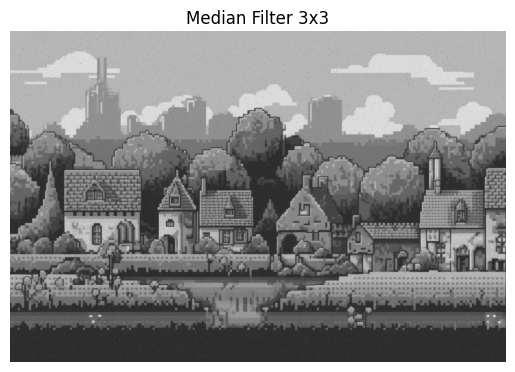

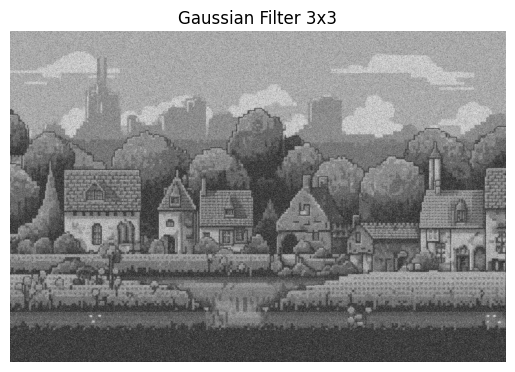

In [73]:
showImages(
    [noisySP, spBoxFiltered, spMedianFiltered, spGaussianFiltered],
    ["Noisy Salt & Pepper (30%)", "Box Filter 3x3", "Median Filter 3x3", "Gaussian Filter 3x3"]
)

# Part 5

In [41]:
guassianResults = []
for kernelSize in [5, 10]:
    print(f"\n=== Results for {kernelSize}x{kernelSize} Kernel (Gaussian)===")
    boxFilteredGaussian = boxFilter(noisyGaussian, kernelSize)
    medianFilteredGaussian = medianFilter(noisyGaussian, kernelSize)
    gaussianFilteredGaussian = gaussianFiliter(noisyGaussian, kernelSize, sigma=1)
    guassianResults.append((boxFilteredGaussian, medianFilteredGaussian, gaussianFilteredGaussian))




=== Results for 5x5 Kernel (Gaussian)===


Gaussina Filter Proccessing: 100%|█████████| 2688/2688 [00:26<00:00, 102.15it/s]



=== Results for 10x10 Kernel (Gaussian)===


Gaussina Filter Proccessing: 100%|█████████| 2688/2688 [00:26<00:00, 101.25it/s]


In [ ]:
SPresutls = []
for kernelSize in [5, 10]:
    print(f"\n=== Results for {kernelSize}x{kernelSize} Kernel (Salt & Pepper)===")
    boxFilteredSP = boxFilter(noisySP, kernelSize)
    medianFilteredSP = medianFilter(noisySP, kernelSize)
    gaussianFilteredSP = gaussianFiliter(noisySP, kernelSize, sigma=1)
    SPresutls.append((boxFilteredSP, medianFilteredSP, gaussianFilteredSP))


=== Results for 5x5 Kernel (Salt & Pepper)===


Gaussina Filter Proccessing: 100%|█████████| 2688/2688 [00:26<00:00, 103.28it/s]



=== Results for 10x10 Kernel (Salt & Pepper)===


Gaussina Filter Proccessing: 100%|█████████| 2688/2688 [00:26<00:00, 100.28it/s]


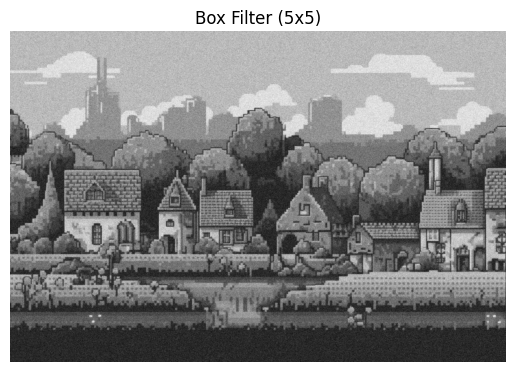

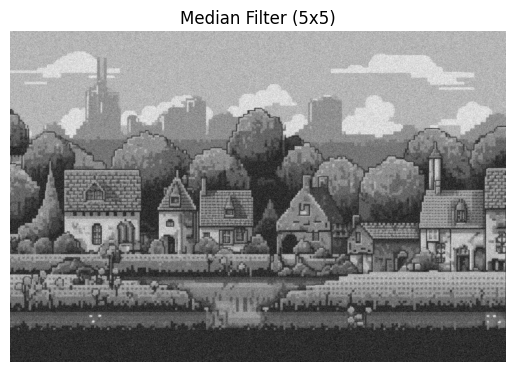

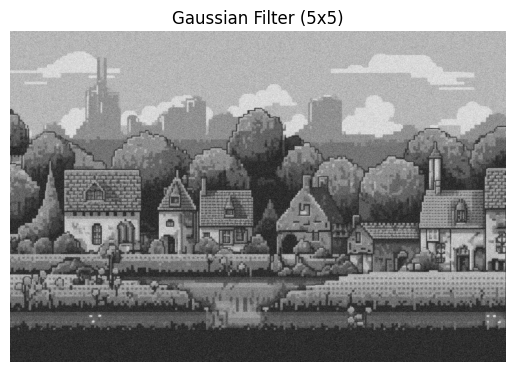

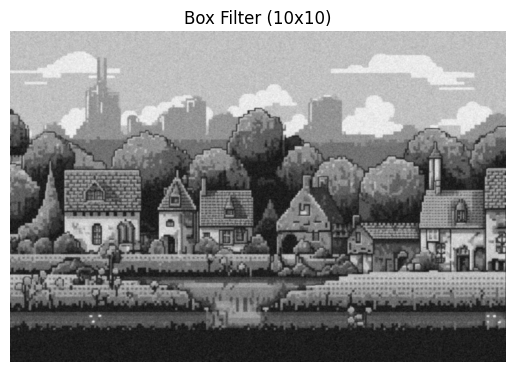

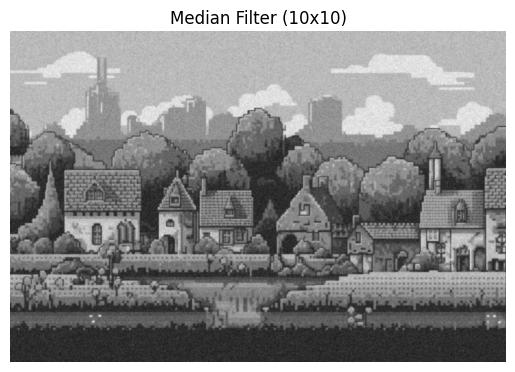

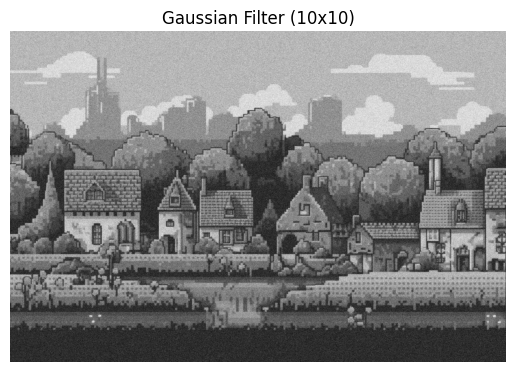

In [80]:
kernalSizes = [5, 10]
for i, results in enumerate(guassianResults):
    boxFilteredGaussian, medianFilteredGaussian, gaussianFilteredGaussian = results
    k = kernalSizes[i]
    showImages(
        [boxFilteredGaussian, medianFilteredGaussian, gaussianFilteredGaussian],
        [f"Box Filter ({k}x{k})", f"Median Filter ({k}x{k})", f"Gaussian Filter ({k}x{k})"]
    )

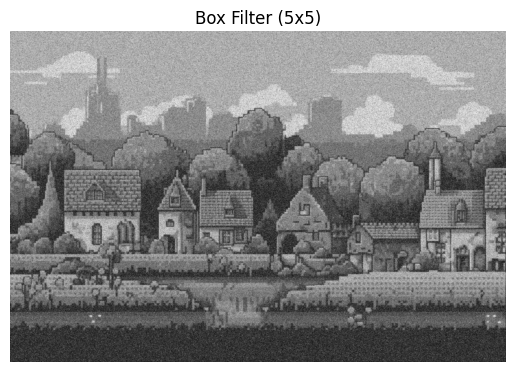

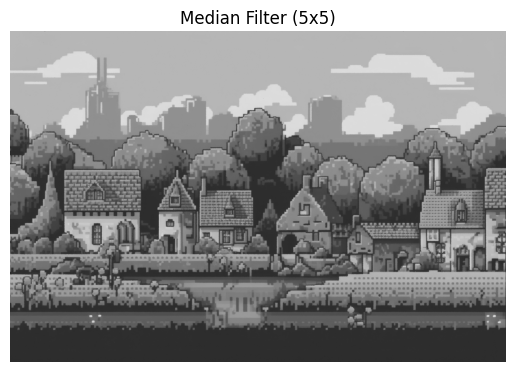

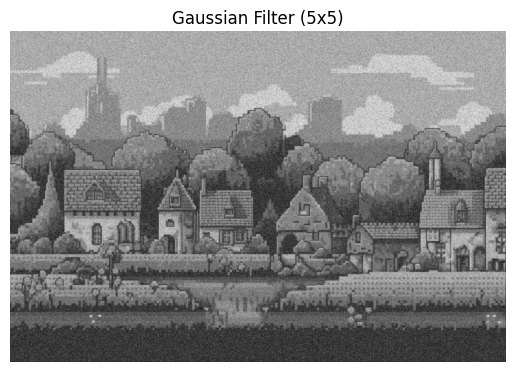

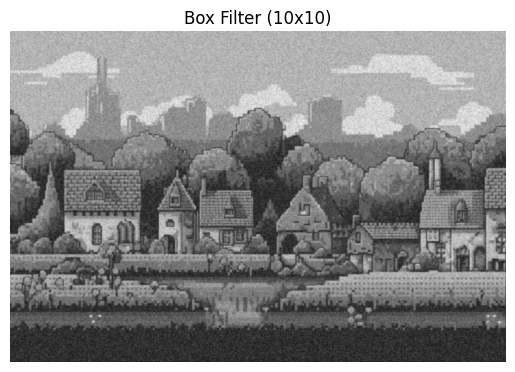

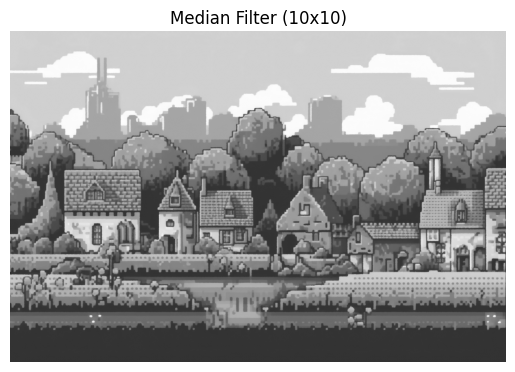

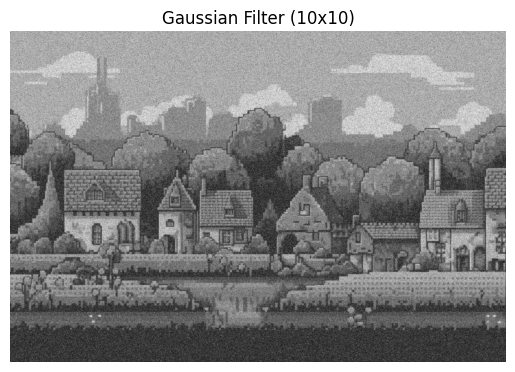

In [81]:
for i, results in enumerate(SPresutls):
    boxFilteredSP, medianFilteredSP, gaussianFilteredSP = results
    k = kernalSizes[i]
    showImages(
        [boxFilteredSP, medianFilteredSP, gaussianFilteredSP],
        [f"Box Filter ({k}x{k})", f"Median Filter ({k}x{k})", f"Gaussian Filter ({k}x{k})"]
    )